In [1]:
#!pip3 install pyaml 

In [1]:
#from collections import defaultdict
#import itertools
#import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yaml
import os
from coco import COCO
import json
import glob


In [2]:
# Read YAML file
with open("configDNVdata.yaml", 'r') as stream:
    config_file = yaml.safe_load(stream)

DATASET_DIR = config_file['dataset_src_dir']
    
TRAIN_PATH = os.path.join(DATASET_DIR, config_file['train'])
VAL_PATH = os.path.join(DATASET_DIR, config_file['val'])
TEST_PATH = os.path.join(DATASET_DIR, config_file['test'])

SIMULATION_SCENARIOS = os.listdir(DATASET_DIR)
MERGE_CLASSES = True

CREATE_JSON_COCO=False

In [3]:
SIMULATION_SCENARIOS = ['2023-05-09_1257_dnv_scenario1_full_00_000_AfternoonClear',
                        '2023-05-09_1300_dnv_scenario1_full_00_000_AfternoonCloudy',
                        '2023-05-09_1302_dnv_scenario1_full_00_000_AfternoonCloudy_Rain',                          
                        '2023-05-09_1308_dnv_scenario1_full_00_000_EveningClear',         
                        '2023-05-09_1311_dnv_scenario1_full_00_000_EveningCloudy',         
                        '2023-05-09_1313_dnv_scenario1_full_00_000_EveningCloudy_Rain',         
                        '2023-05-09_1315_dnv_scenario1_full_00_000_FoggyClear',         
                        '2023-05-09_1317_dnv_scenario1_full_00_000_FoggyCloudy',         
                        '2023-05-09_1319_dnv_scenario1_full_00_000_MorningClear',         
                        '2023-05-09_1321_dnv_scenario1_full_00_000_MorningCloudy',         
                        '2023-05-09_1324_dnv_scenario1_full_00_000_NightClear',         
                        '2023-05-09_1326_dnv_scenario1_full_00_000_NightCloudy',         
                        '2023-05-09_1328_dnv_scenario1_full_00_000_NoonClear',         
                        '2023-05-09_1330_dnv_scenario1_full_00_000_NoonCloudy',         
                        '2023-05-09_1332_dnv_scenario1_full_00_000_NoonCloudy_Rain',         
                        '2023-05-09_1335_dnv_scenario1_full_00_000_Overcast',                 
                        '2023-05-09_1339_dnv_scenario1_full_00_000_StormClouds',         
                        '2023-05-09_1341_dnv_scenario1_full_00_000_StormyClouds_Rain']

In [4]:
"""SIMULATION_SCENARIOS = ['2023-05-12_1427_dnv_scenario1_full_00_000_AfternoonClear_absoluteCalmBlueSea',    
                        '2023-05-12_1429_dnv_scenario1_full_00_000_AfternoonCloudy_absoluteCalmBlueSea',    
                        '2023-05-12_1431_dnv_scenario1_full_00_000_AfternoonCloudy_Rain_absoluteCalmBlueSea',       
                        '2023-05-12_1437_dnv_scenario1_full_00_000_EveningClear_absoluteCalmBlueSea',    
                        '2023-05-12_1439_dnv_scenario1_full_00_000_EveningCloudy_absoluteCalmBlueSea',    
                        '2023-05-12_1442_dnv_scenario1_full_00_000_EveningCloudy_Rain_absoluteCalmBlueSea',    
                        '2023-05-12_1444_dnv_scenario1_full_00_000_FoggyClear_absoluteCalmBlueSea',    
                        '2023-05-12_1446_dnv_scenario1_full_00_000_FoggyCloudy_absoluteCalmBlueSea',    
                        '2023-05-12_1450_dnv_scenario1_full_00_000_MorningCloudy_absoluteCalmBlueSea',    
                        '2023-05-12_1448_dnv_scenario1_full_00_000_MorningClear_absoluteCalmBlueSea',    
                        '2023-05-12_1452_dnv_scenario1_full_00_000_NightClear_absoluteCalmBlueSea',    
                        '2023-05-12_1454_dnv_scenario1_full_00_000_NightCloudy_absoluteCalmBlueSea',    
                        '2023-05-12_1456_dnv_scenario1_full_00_000_NoonClear_absoluteCalmBlueSea',    
                        '2023-05-12_1458_dnv_scenario1_full_00_000_NoonCloudy_absoluteCalmBlueSea',    
                        '2023-05-12_1500_dnv_scenario1_full_00_000_NoonCloudy_Rain_absoluteCalmBlueSea',    
                        '2023-05-12_1502_dnv_scenario1_full_00_000_Overcast_absoluteCalmBlueSea',    
                        '2023-05-12_1504_dnv_scenario1_full_00_000_OvercastRandomize_absoluteCalmBlueSea',    
                        '2023-05-12_1506_dnv_scenario1_full_00_000_StormClouds_absoluteCalmBlueSea',    
                        '2023-05-12_1508_dnv_scenario1_full_00_000_StormyClouds_Rain_absoluteCalmBlueSea'
                        ]"""





"SIMULATION_SCENARIOS = ['2023-05-12_1427_dnv_scenario1_full_00_000_AfternoonClear_absoluteCalmBlueSea',    \n                        '2023-05-12_1429_dnv_scenario1_full_00_000_AfternoonCloudy_absoluteCalmBlueSea',    \n                        '2023-05-12_1431_dnv_scenario1_full_00_000_AfternoonCloudy_Rain_absoluteCalmBlueSea',       \n                        '2023-05-12_1437_dnv_scenario1_full_00_000_EveningClear_absoluteCalmBlueSea',    \n                        '2023-05-12_1439_dnv_scenario1_full_00_000_EveningCloudy_absoluteCalmBlueSea',    \n                        '2023-05-12_1442_dnv_scenario1_full_00_000_EveningCloudy_Rain_absoluteCalmBlueSea',    \n                        '2023-05-12_1444_dnv_scenario1_full_00_000_FoggyClear_absoluteCalmBlueSea',    \n                        '2023-05-12_1446_dnv_scenario1_full_00_000_FoggyCloudy_absoluteCalmBlueSea',    \n                        '2023-05-12_1450_dnv_scenario1_full_00_000_MorningCloudy_absoluteCalmBlueSea',    \n               

In [5]:
CURRENT_SCENARIO_PATH = os.path.join(DATASET_DIR, SIMULATION_SCENARIOS[9])
IMAGES_PATH = os.path.join(CURRENT_SCENARIO_PATH, 'images/')



In [6]:
def make_coco_imagelist(folderpath):
    image_paths = glob.glob(f'{folderpath}/*.jpg')
    images = []
    for image_path in image_paths:
        height = 2056
        width = 2464
        filename = image_path.split('/')[-1]
        image_id = filename.split('.')[0]
        images.append({'filename':filename, 'height':height, 'width': width,  'id': image_id})
    return images

def convert_bb(bb):
    x_left, y_bottom = bb[0].values()
    x_right, y_top = bb[1].values()
    width = x_right - x_left
    height = y_top - y_bottom

    return [round(x_left), round(y_bottom), round(width), round(height)]

def make_coco_annot_list(folderpath, merge_classes=True):
    annotation_paths = glob.glob(f'{folderpath}/*.json')

    categories = []
    categories_coco = []
    annots_coco = []
    if merge_classes:
        categories_coco = [{"supercategory": "none",
                                            "id": 0,
                                            "name": 'boat'}]
    for annot_path in annotation_paths:
        image_id = annot_path.split('/')[-1].split('.')[0]
        with open(annot_path, 'r') as data_file:
            json_data = data_file.read()

        data = json.loads(json_data)
        for i, annot in enumerate(data):
            annot_id = image_id+f'_{i}'
            bbox = convert_bb(annot['BB2D'])
            area = bbox[2]*bbox[3] # width*height
            if not merge_classes:
                alias = annot['Alias']
                if alias not in categories: 
                    categories_coco.append({"supercategory": "none",
                                            "id": len(categories),
                                            "name": alias})
                    categories.append(alias)
                category_id = categories.index(alias)
            else:
                category_id = 0

            annot_coco_format = {'area': area, 'iscrowd': 0, 'bbox': bbox, 'category_id': category_id, 'segmentation': [], 'image_id': image_id, 'id': annot_id}
            annots_coco.append(annot_coco_format)
    return annots_coco, categories_coco

In [7]:
if CREATE_JSON_COCO:
    ttype = "instances"
    for folder in SIMULATION_SCENARIOS:
        if folder.split('.')[-1] == 'png': continue
        if folder.split('.')[-1] == 'txt': continue
        if folder.split('.')[-1] == 'cache': continue

        visual_data_folder = os.path.join(os.path.join(DATASET_DIR, folder), 'images/')
        images = make_coco_imagelist(visual_data_folder)
        annots_coco, categories = make_coco_annot_list(visual_data_folder)

        coco_json_dict = {'images':images, 'type': ttype, 'annotations': annots_coco, 'categories': categories}
        
        out_path = os.path.join(os.path.join(DATASET_DIR, folder), 'coco.json')
        with open(out_path, 'w+') as outfile:
            json.dump(coco_json_dict, outfile, indent=4)

In [8]:
datasets = {}
for scenario in SIMULATION_SCENARIOS:
    dataset_path = os.path.join(DATASET_DIR, os.path.join(scenario, 'coco.json'))
    data = COCO(dataset_path)
    datasets[scenario] = data
CLASSES = {id: cat['name'] for id, cat in data.cats.items()}

creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!


In [9]:
catIds = list(CLASSES.keys())
catIds.sort()
sorted_class_names = [CLASSES[id] for id in catIds]
dataset_info = {'path': DATASET_DIR, 'train': config_file['train'], 'val': config_file['val'], 'test': config_file['test'], 'nc': len(CLASSES), 'names': sorted_class_names}

In [10]:
# Read YAML file
with open("datasetDNV.yaml", 'w+') as file:
    yaml.dump(dataset_info, file)

In [11]:
numb_images = len(data.imgs)
print('Number of images: ', numb_images)
numb_of_categories = len(data.cats)
print('Number of classes:', numb_of_categories)
print('Classes:', [cat['name'] for cat in data.cats.values()])

Number of images:  675
Number of classes: 1
Classes: ['boat']


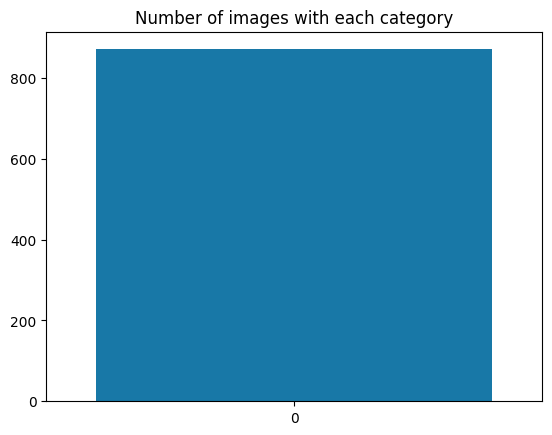

{0: 'boat'}


In [12]:
cat_stats = {id : len(imgs) for id, imgs in data.catToImgs.items()}

sns.set_palette("winter", len(cat_stats))
sns.barplot(x=list(cat_stats.keys()), y= list(cat_stats.values())).set(title='Number of images with each category')
plt.show()
print(CLASSES)

In [13]:
#image_ids = ['CAM00_img046','CAM00_img054', 'CAM00_img055', 'CAM00_img065'] 
#images_path = './hurtigruten/images/'

#for image_id in image_ids:
#    data.visualizeImage(image_id, IMAGES_PATH, image_type='.jpg')

2023-05-09_1257_dnv_scenario1_full_00_000_AfternoonClear


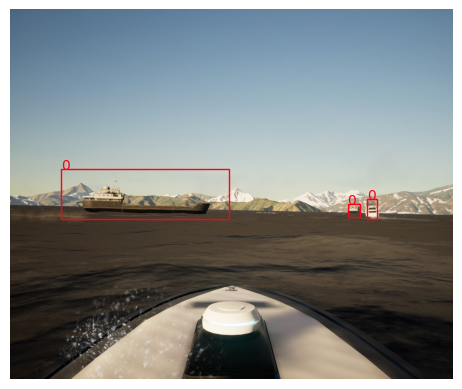

[{'area': 4970, 'iscrowd': 0, 'bbox': [1877, 1082, 71, 70], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 259652, 'iscrowd': 0, 'bbox': [283, 890, 934, 278], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 6667, 'iscrowd': 0, 'bbox': [1984, 1054, 59, 113], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1300_dnv_scenario1_full_00_000_AfternoonCloudy


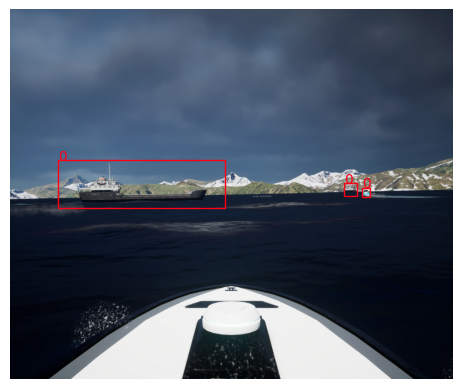

[{'area': 4968, 'iscrowd': 0, 'bbox': [1856, 967, 72, 69], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 250977, 'iscrowd': 0, 'bbox': [265, 838, 933, 269], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 2214, 'iscrowd': 0, 'bbox': [1960, 991, 41, 54], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1302_dnv_scenario1_full_00_000_AfternoonCloudy_Rain


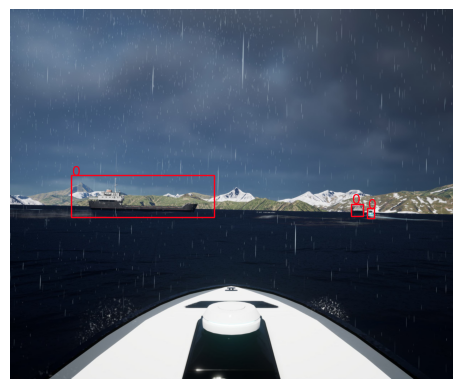

[{'area': 4760, 'iscrowd': 0, 'bbox': [1897, 1080, 68, 70], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 187384, 'iscrowd': 0, 'bbox': [340, 921, 794, 236], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 2214, 'iscrowd': 0, 'bbox': [1985, 1105, 41, 54], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1308_dnv_scenario1_full_00_000_EveningClear


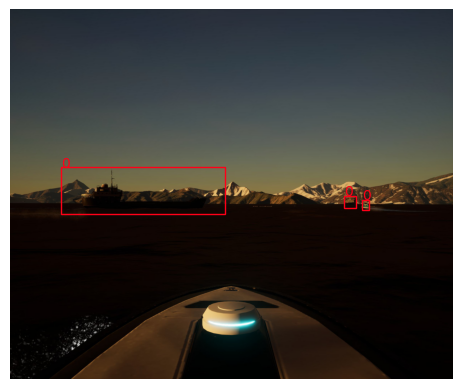

[{'area': 4761, 'iscrowd': 0, 'bbox': [1858, 1035, 69, 69], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 236600, 'iscrowd': 0, 'bbox': [283, 878, 910, 260], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 2160, 'iscrowd': 0, 'bbox': [1957, 1059, 40, 54], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1311_dnv_scenario1_full_00_000_EveningCloudy


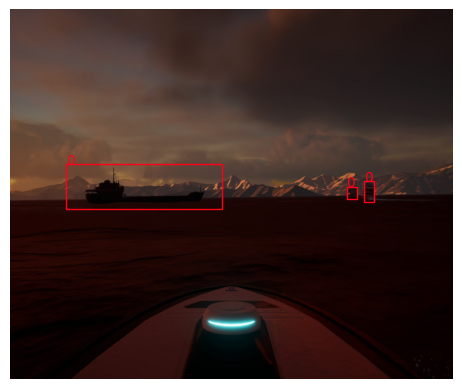

[{'area': 4140, 'iscrowd': 0, 'bbox': [1872, 986, 60, 69], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 213655, 'iscrowd': 0, 'bbox': [312, 862, 865, 247], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 6555, 'iscrowd': 0, 'bbox': [1968, 954, 57, 115], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1313_dnv_scenario1_full_00_000_EveningCloudy_Rain


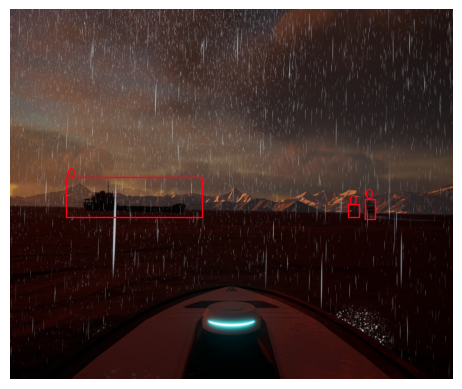

[{'area': 4130, 'iscrowd': 0, 'bbox': [1881, 1082, 59, 70], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 166413, 'iscrowd': 0, 'bbox': [313, 933, 753, 221], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 6667, 'iscrowd': 0, 'bbox': [1972, 1053, 59, 113], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1315_dnv_scenario1_full_00_000_FoggyClear


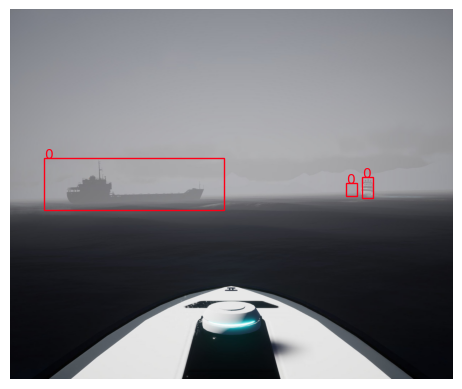

[{'area': 4071, 'iscrowd': 0, 'bbox': [1869, 967, 59, 69], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 288288, 'iscrowd': 0, 'bbox': [187, 826, 1001, 288], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 6726, 'iscrowd': 0, 'bbox': [1959, 934, 59, 114], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1317_dnv_scenario1_full_00_000_FoggyCloudy


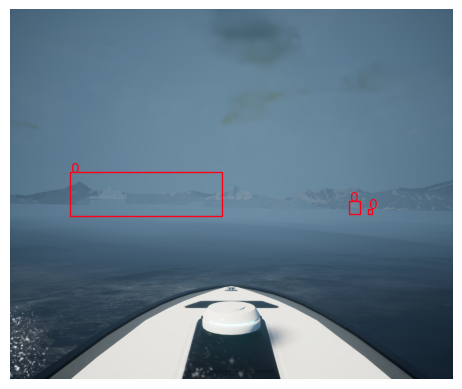

[{'area': 4130, 'iscrowd': 0, 'bbox': [1886, 1065, 59, 70], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 205204, 'iscrowd': 0, 'bbox': [336, 906, 841, 244], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 713, 'iscrowd': 0, 'bbox': [1992, 1108, 23, 31], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1319_dnv_scenario1_full_00_000_MorningClear


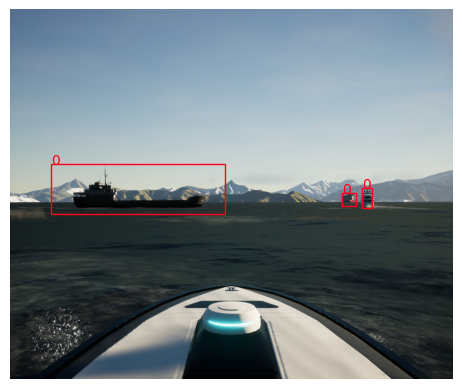

[{'area': 5244, 'iscrowd': 0, 'bbox': [1846, 1023, 76, 69], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 266064, 'iscrowd': 0, 'bbox': [229, 861, 964, 276], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 6608, 'iscrowd': 0, 'bbox': [1957, 993, 59, 112], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1321_dnv_scenario1_full_00_000_MorningCloudy


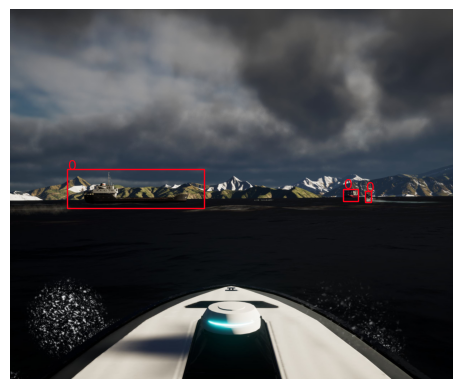

[{'area': 5658, 'iscrowd': 0, 'bbox': [1854, 996, 82, 69], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 165788, 'iscrowd': 0, 'bbox': [317, 889, 764, 217], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 2135, 'iscrowd': 0, 'bbox': [1975, 1012, 35, 61], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1324_dnv_scenario1_full_00_000_NightClear


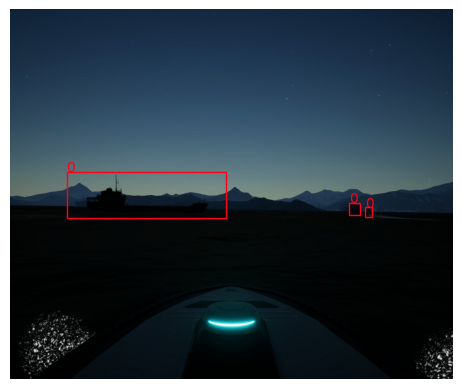

[{'area': 4270, 'iscrowd': 0, 'bbox': [1888, 1075, 61, 70], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 229215, 'iscrowd': 0, 'bbox': [314, 903, 885, 259], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 2214, 'iscrowd': 0, 'bbox': [1974, 1100, 41, 54], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1326_dnv_scenario1_full_00_000_NightCloudy


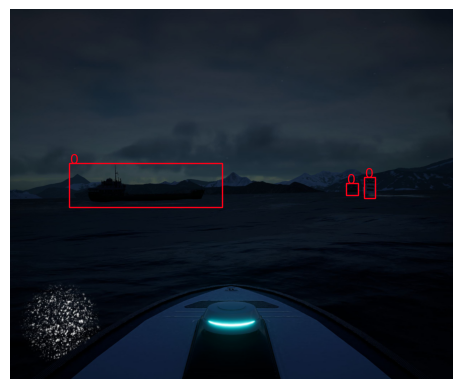

[{'area': 4485, 'iscrowd': 0, 'bbox': [1869, 965, 65, 69], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 207888, 'iscrowd': 0, 'bbox': [327, 855, 852, 244], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 6900, 'iscrowd': 0, 'bbox': [1971, 932, 60, 115], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1328_dnv_scenario1_full_00_000_NoonClear


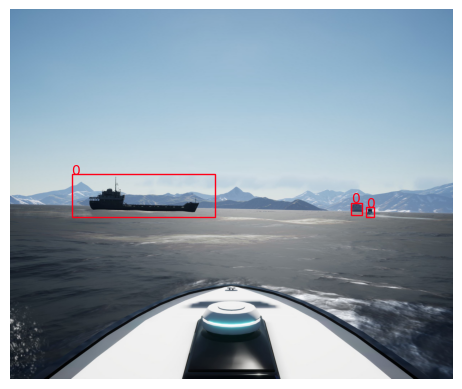

[{'area': 4480, 'iscrowd': 0, 'bbox': [1896, 1075, 64, 70], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 189600, 'iscrowd': 0, 'bbox': [342, 916, 800, 237], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 2214, 'iscrowd': 0, 'bbox': [1982, 1100, 41, 54], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1330_dnv_scenario1_full_00_000_NoonCloudy


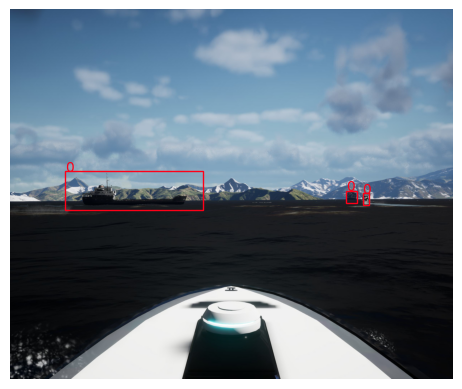

[{'area': 4002, 'iscrowd': 0, 'bbox': [1871, 1009, 58, 69], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 165024, 'iscrowd': 0, 'bbox': [307, 900, 764, 216], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 2232, 'iscrowd': 0, 'bbox': [1961, 1023, 36, 62], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1332_dnv_scenario1_full_00_000_NoonCloudy_Rain


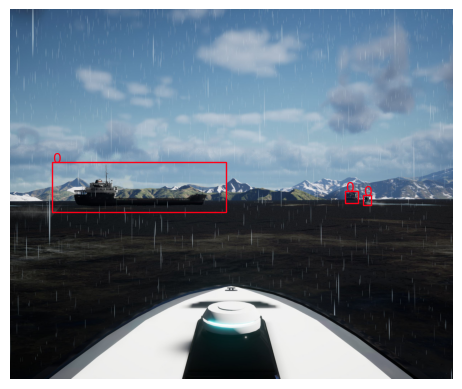

[{'area': 4761, 'iscrowd': 0, 'bbox': [1865, 1010, 69, 69], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 266616, 'iscrowd': 0, 'bbox': [234, 848, 966, 276], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 2214, 'iscrowd': 0, 'bbox': [1964, 1034, 41, 54], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1335_dnv_scenario1_full_00_000_Overcast


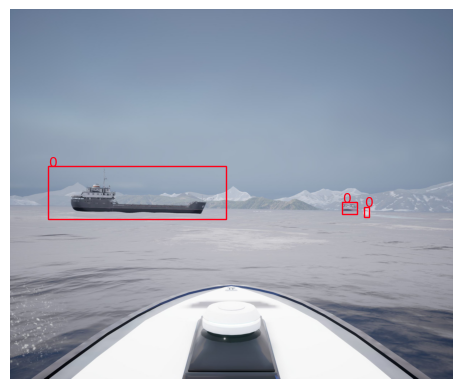

[{'area': 5589, 'iscrowd': 0, 'bbox': [1849, 1071, 81, 69], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 289080, 'iscrowd': 0, 'bbox': [210, 873, 990, 292], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 1705, 'iscrowd': 0, 'bbox': [1968, 1097, 31, 55], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1339_dnv_scenario1_full_00_000_StormClouds


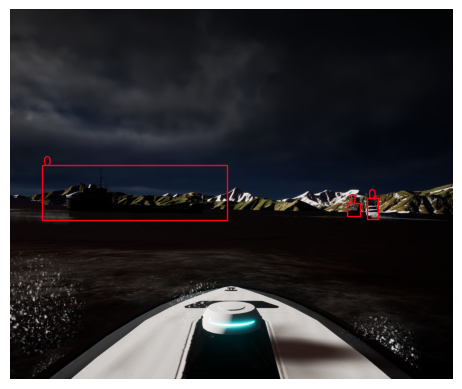

[{'area': 5110, 'iscrowd': 0, 'bbox': [1876, 1079, 73, 70], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 312930, 'iscrowd': 0, 'bbox': [180, 867, 1026, 305], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 6667, 'iscrowd': 0, 'bbox': [1987, 1050, 59, 113], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]
2023-05-09_1341_dnv_scenario1_full_00_000_StormyClouds_Rain


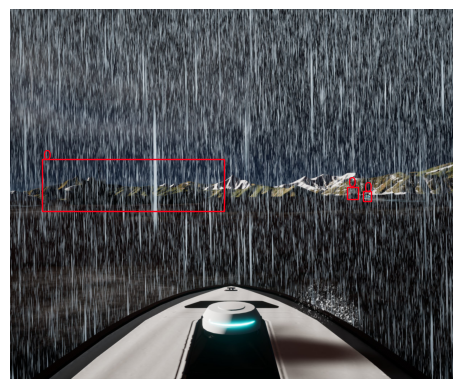

[{'area': 4071, 'iscrowd': 0, 'bbox': [1874, 986, 59, 69], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_0'}, {'area': 293770, 'iscrowd': 0, 'bbox': [179, 832, 1013, 290], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_1'}, {'area': 2214, 'iscrowd': 0, 'bbox': [1965, 1010, 41, 54], 'category_id': 0, 'segmentation': [], 'image_id': 'CAM00_img028', 'id': 'CAM00_img028_2'}]


In [14]:
image_id = 'CAM00_img028'
#image_id = 'CAM00_img038'
anns = []

for scenario in SIMULATION_SCENARIOS:
    print(scenario)
    folder_path = os.path.join(DATASET_DIR, scenario)
    image_path = os.path.join(folder_path, 'images/')
    data = datasets[scenario]
    data.visualizeImage(image_id, image_path, image_type='.jpg')
    ann = data.loadAnns(data.getAnnIds(image_id))
    print(ann)
    anns.append(ann)

In [15]:
SIMULATION_SCENARIOS

['2023-05-09_1257_dnv_scenario1_full_00_000_AfternoonClear',
 '2023-05-09_1300_dnv_scenario1_full_00_000_AfternoonCloudy',
 '2023-05-09_1302_dnv_scenario1_full_00_000_AfternoonCloudy_Rain',
 '2023-05-09_1308_dnv_scenario1_full_00_000_EveningClear',
 '2023-05-09_1311_dnv_scenario1_full_00_000_EveningCloudy',
 '2023-05-09_1313_dnv_scenario1_full_00_000_EveningCloudy_Rain',
 '2023-05-09_1315_dnv_scenario1_full_00_000_FoggyClear',
 '2023-05-09_1317_dnv_scenario1_full_00_000_FoggyCloudy',
 '2023-05-09_1319_dnv_scenario1_full_00_000_MorningClear',
 '2023-05-09_1321_dnv_scenario1_full_00_000_MorningCloudy',
 '2023-05-09_1324_dnv_scenario1_full_00_000_NightClear',
 '2023-05-09_1326_dnv_scenario1_full_00_000_NightCloudy',
 '2023-05-09_1328_dnv_scenario1_full_00_000_NoonClear',
 '2023-05-09_1330_dnv_scenario1_full_00_000_NoonCloudy',
 '2023-05-09_1332_dnv_scenario1_full_00_000_NoonCloudy_Rain',
 '2023-05-09_1335_dnv_scenario1_full_00_000_Overcast',
 '2023-05-09_1339_dnv_scenario1_full_00_000_Sto

2023-05-09_1328_dnv_scenario1_full_00_000_NoonClear
CAM00_img145


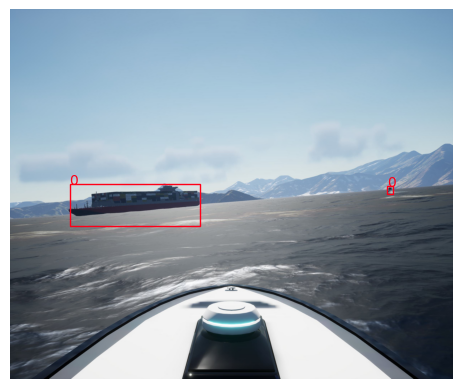

CAM00_img146


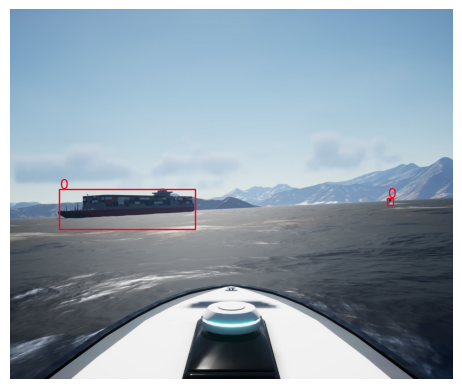

CAM00_img147


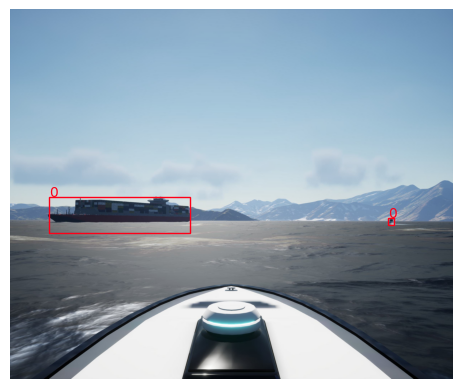

CAM00_img148


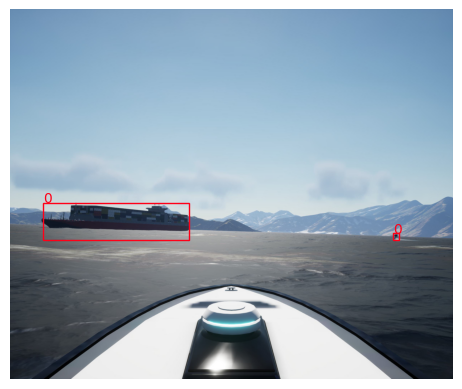

CAM00_img149


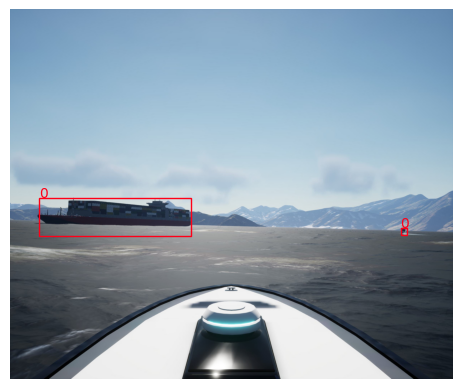

In [25]:
image_id = 'CAM00_img028'
#image_id = 'CAM00_img038'
anns = []
scenario = '2023-05-09_1328_dnv_scenario1_full_00_000_NoonClear'
print(scenario)
folder_path = os.path.join(DATASET_DIR, scenario)
image_path = os.path.join(folder_path, 'images/')
data = datasets[scenario]
for image_num in range(145, 150):
    str_num = str(image_num)
    str_num = str_num.rjust(3, '0')
    image_id = f'CAM00_img{str_num}'
    print(image_id)
    data.visualizeImage(image_id, image_path, image_type='.jpg')
